                    KMeans Algorithm

This is a type of unsupervised learning technique in which no prior labeling of data is required. In fact, the purpose of the algorithm is to group data based on distance similarity. K number of central points known as centroids are chosen and the closest datapoints in the dataset are assigned to those centroids. After each iteration, the centroid is updated by selecting the mean data point in the cluster; this pretty much explains why the algorithm is known as KMeans!

We shall follow two strategies to group our 2D data points:

* Randomly initialize the centroids
* Used KMeans++ technique to initialize the centroids

STEP0: Function definition

* Define the euclidean distance function necessary for clustering and tracking centroid reassignment
* Define a function for randomly initializing k centroid coordinates for strategy1
* Define the init_point function

STEP1: Centroid initialization

* For strategy 1, just call the functions from step0 to initialize the k centroids
* For strateg2, call the function from step1 to initialize the first centroid, then implement an algorithm to assign the farthest datapoint from all current centroids as the new centroid until you have k centroids

STEP2: Defining the kmeans algorithm

* Once k centroids are initiated, you'll have to optmize the position of each centroid
* For every datapoint, the euclidean distance for each centroid is calculated. The datapoint is then assigned to nearest centroid.
* After the clustering for all datapoints is completed, the coordinate values of the mean of the datapoints in a cluster are also the coordinates of the new centroid.
* The process is repeated until there is no change between the old and new centroids

STEP3: Evaluating your model

* Recall that we don't really have any ideal clusters or labels for the data. Your ultimate goal is to minimize the total overall distance between the datapoints and their clusters; the smaller the overall all distance the better the clustering algorithm.

Error for strategy1: 60.32860655956233
Error for strategy2: 60.32860655956233


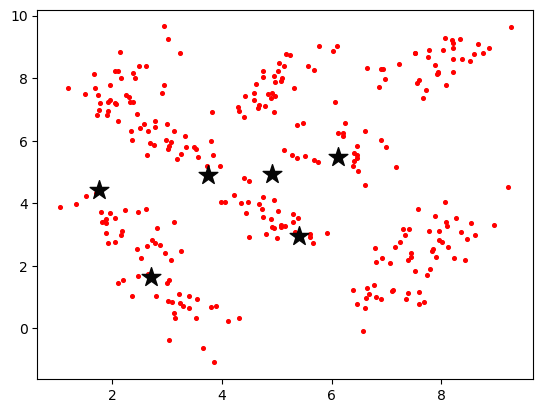

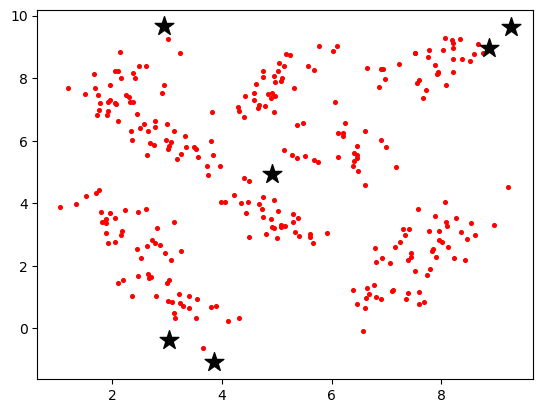

In [14]:
import numpy as np
import random
from copy import deepcopy
from matplotlib import pyplot as plt

#STEP 0:

# Define the distance function (Euclidean distance calculator)
def dist(a, b):
    return np.linalg.norm(a - b)

#Randomly initializing k centroids for strategy1
def initial_point_idx(id, k, N):
    return np.random.RandomState(seed=(id + k)).choice(N, k, replace=False)

# Define or import the init_point function
def init_point(data, idx):
    return data[idx, :]

# STEP 1:

#Centroid initialization for strategy1
def strategy1(id, k):
    init_idx = initial_point_idx(id, k, data.shape[0])
    init_s1 = init_point(data, init_idx)
    init_s1 = kMeans(k, init_s1)
    return init_s1

#Centroid initialization for strategy2
def initial_point_idx2(id, k, N):
    random.seed((int(id) % 150 + k))
    return random.randint(0, N - 1)

def strategy2(id, k):
    init_idx2 = initial_point_idx2(id, k, data.shape[0])
    init_s1 = np.array(data[init_idx2, :])
    
    data1 = np.delete(data, init_idx2, axis=0)
    
    for _ in range(1, k):
        squared_distances = np.array([sum([np.inner(centroid - sample, centroid - sample) for centroid in init_s1]) for sample in data1])
        prob = squared_distances / squared_distances.sum()
    
        for index, probability in enumerate(prob):
            if probability == prob.max():
                init_s1 = np.vstack((init_s1, data1[index]))
                data1 = np.delete(data1, index, axis=0)
                break
    
    init_s1 = kMeans(k, init_s1)
    return init_s1

# STEP 2:

#K-means clustering algorithm
def kMeans(k, init_s1):
    init_s1_old = np.zeros(init_s1.shape)
    clusters = np.zeros(len(data))
    
    error = dist(init_s1, init_s1_old)
    while error != 0:
        for i in range(len(data)):
            distances = dist(data[i], init_s1)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        
        for i in range(k):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            
            # Check if the cluster is not empty before calculating the mean
            if points:
                init_s1[i] = np.mean(points, axis=0)
        
        error = dist(init_s1, init_s1_old)
        init_s1_old = deepcopy(init_s1)
#STEP 3:

# Evaluation and plotting the clustered datapoints
    colors = ['r', 'g', 'b', 'y', 'c', 'c']
    fig, ax = plt.subplots()
    total_dist = 0
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        
        # Check if the cluster is not empty before calculating the distance
        if points.size > 0:
            distance = dist(init_s1[i], points)
            total_dist += distance.sum()
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
    ax.scatter(init_s1[:, 0], init_s1[:, 1], marker='*', s=200, c='#050505')

    return init_s1, total_dist
#STEP 4:

# Loading the dataset
data = np.load('AllSamples.npy')

# Define the number of clusters for each strategy
k1 = 6
k2 = 6

# Apply strategy1 and strategy2
init_s1, error1 = strategy1(1489, k1)
init_s2, error2 = strategy2(1489, k2)

# Print the errors for each strategy
print("Error for strategy1:", error1)
print("Error for strategy2:", error2)
